<a href="https://colab.research.google.com/github/Babiamba/Neuroniniai-tinklai/blob/main/Batch_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Batch Normalization

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/50
157/157 [==============================] - 2s 6ms/step - loss: 0.4467 - accuracy: 0.8670 - val_loss: 0.5191 - val_accuracy: 0.8778
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1706 - accuracy: 0.9522 - val_loss: 0.2813 - val_accuracy: 0.9244
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1018 - accuracy: 0.9724 - val_loss: 0.2499 - val_accuracy: 0.9246
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.0707 - accuracy: 0.9836 - val_loss: 0.2222 - val_accuracy: 0.9320
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0503 - accuracy: 0.9894 - val_loss: 0.2144 - val_accuracy: 0.9354
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0299 - accuracy: 0.9946 - val_loss: 0.2007 - val_accuracy: 0.9402
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0209 - 

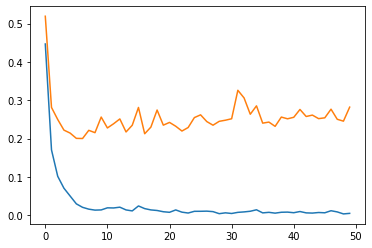

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         #  Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Standartizacija įvesties duomenų
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

limit = 5000
x_train_data = x_train[:limit]
y_train_data = y_train_cat[:limit]

x_valid = x_train[limit:limit*2]
y_valid = y_train_cat[limit:limit*2]

model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(300, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax') ])

# print(model.summary())      

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


his = model.fit(x_train_data, y_train_data, epochs=50, batch_size=32, validation_data=(x_valid, y_valid))


plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()